# A Guided Exploration of UN Data (Gross Domestic Product and Internet Usage

**1.** Create a `data` folder in your local project repository.

**2.** Download these two CSV files and place them in the data folder:
    a.	Gross Domestic Product (GDP) per capita http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD **DO NOT APPLY ANY FILTERS**
     - rename the file to `gdp_percapita.csv`
     - open it with a text editor (**not excel**) and take a look
    b.	Percentage of Individuals using the Internet http://data.un.org/Data.aspx?d=ITU&f=ind1Code%3aI99H  **DO NOT APPLY ANY FILTERS**
     - rename the file to `internet_use.csv`
     - open it with a text editor (**not excel**) and take a look

**2.** Create a `notebooks` folder and launch a Jupyter Notebook in this folder. Give it a meaningful name.
    - **IMPORTANT:**  You are likely to get errors along the way. When you do, read the errors to try to understand what is happening and how to correct it.
    - Use markdown cells to record your answers to any questions asked in this exercise. On the menu bar, you can toggle the cell type from `Code` to `Markdown`.

**3.** Import pandas, numpy, matplotlib.pyplot, and seaborn:

In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**4.** Read in the GDP dataset and look at the first few rows.

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


**5.** How many rows and columns are in `gdp_df`? What are the data types of each column?

In [3]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


**6.** Drop the `Value Footnotes` column and rename the remaining three to `Country`, `Year`, and `GDP_Per_Capita`.

In [4]:
del gdp_df['Value Footnotes']
gdp_df.rename(columns = {'Country or Area':'Country', 'Value':'GDP_Per_Capita'}, inplace = True)
#Check
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


**7.** How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [8]:
unique_years = pd.DataFrame(gdp_df.groupby(['Country'])['Year'].count())
unique_years.reset_index(inplace=True)
print(unique_years[unique_years['Year']==33])
print(unique_years[unique_years['Year']!=33])

                         Country  Year
1    Africa Eastern and Southern    33
2     Africa Western and Central    33
3                        Albania    33
4                        Algeria    33
5                         Angola    33
..                           ...   ...
236                      Vanuatu    33
237                     Viet Nam    33
239                        World    33
240                       Zambia    33
241                     Zimbabwe    33

[202 rows x 2 columns]
                       Country  Year
0                  Afghanistan    20
10                       Aruba    32
22                      Bhutan    32
24      Bosnia and Herzegovina    29
32                    Cambodia    30
36              Cayman Islands    16
46                     Croatia    28
47                    CuraÃ§ao    22
53                    Djibouti    10
64                     Estonia    28
91                     Hungary    32
97                     Iceland    28
103                     Isr

**Answer:** There are 241 countries with data for all years.

**8.** In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [9]:
gdp_2020 = gdp_df[gdp_df['Year']==2020]

C:\Users\chabi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


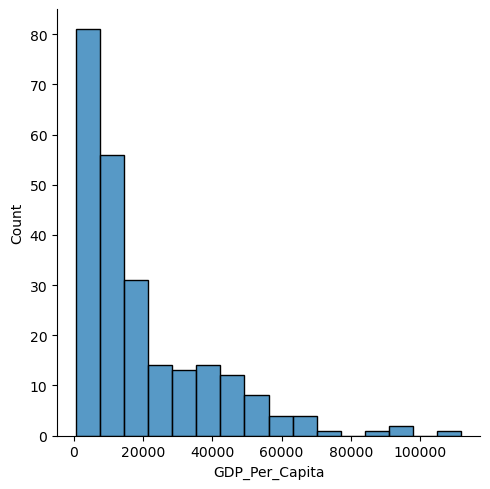

In [10]:
#histogram
sns.displot(x=gdp_2020['GDP_Per_Capita']);

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

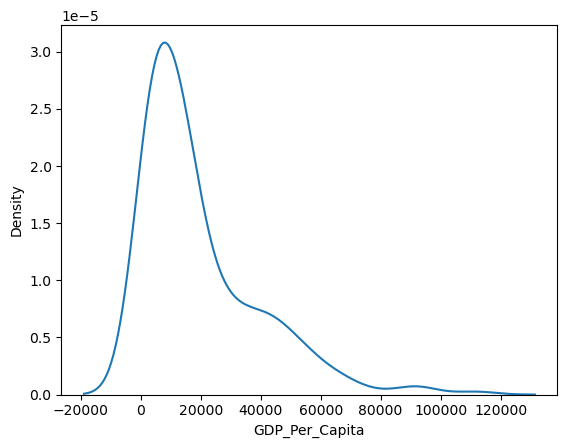

In [11]:
#densityplot
sns.kdeplot(gdp_2020['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

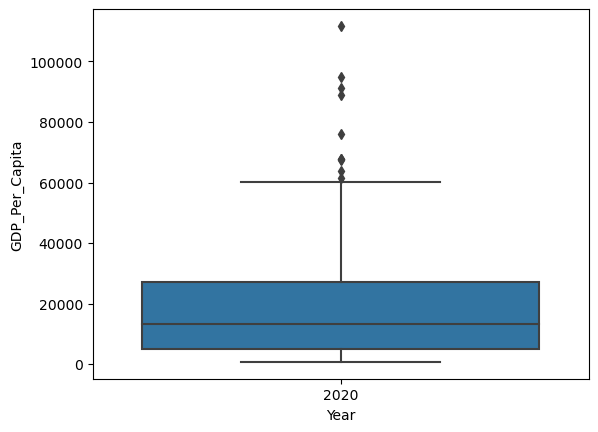

In [12]:
#boxplot
sns.boxplot(x=gdp_2020['Year'], y=gdp_2020['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

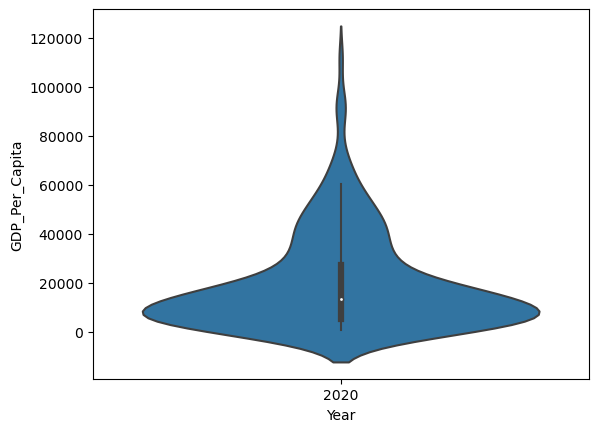

In [13]:
#violinplot
sns.violinplot(x=gdp_2020['Year'], y=gdp_2020['GDP_Per_Capita'])

**Answer:** The majority of countries appear to have a GDP per capita somewhere in the realm of \\$10,000, with a very small subset having a GDP per capita greater than \\$60,000. Interestingly, there are also some negative values.
As for chart types, while the histogram and density plots probably look more familiar to most people, I think the violin plot does the best job of illustrating that the distribution of GDP is skewed toward the bottom of the range. I don't think a box plot would be the best choice to answer this question because it just presents everything as an outlier, and that's not really the point here.

**9.** What was the median GDP per capita value in 2020?

In [14]:
median_gdp_2020 = gdp_2020['GDP_Per_Capita'].agg('median')
print(median_gdp_2020)

13357.997573370474


**Answer:** $13.358.00

**10.** For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
- A boxplot
- A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
- A scatterplot
- A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)

Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [15]:
gdp_decades = gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

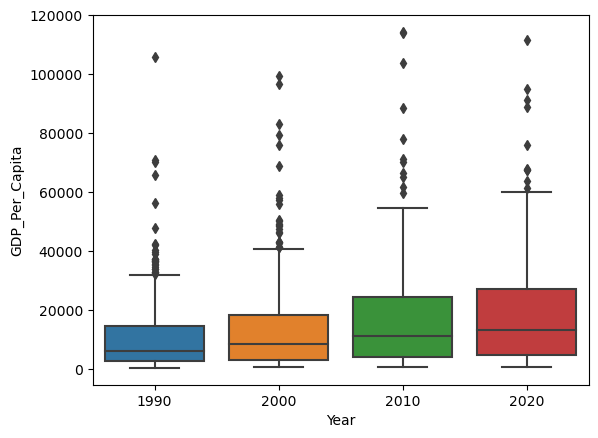

In [16]:
#boxplot
sns.boxplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

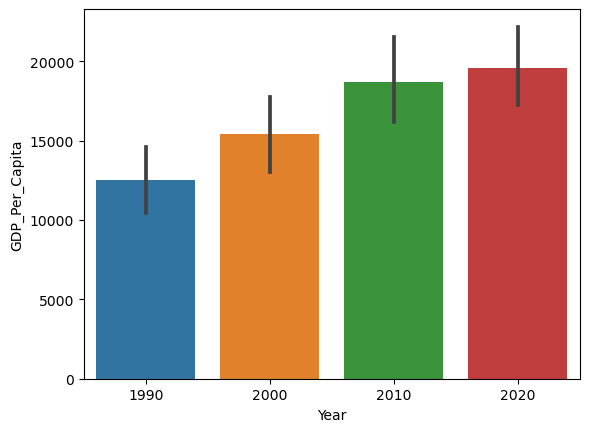

In [17]:
#barplot
sns.barplot(x='Year', y='GDP_Per_Capita', data=gdp_decades)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

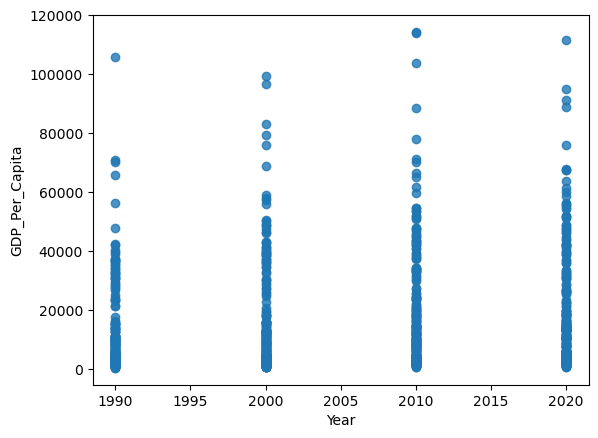

In [18]:
#scatterplot
sns.regplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'], fit_reg=False)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

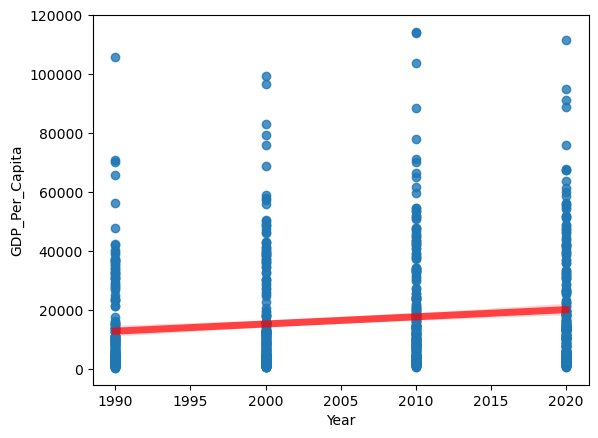

In [19]:
#scatterplot with trend line
sns.regplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'], line_kws={"color":"r","alpha":0.7,"lw":5})

**Answer:** Generally, GDP per capita has increased over time. This is most evident in either the bar plot or the trend line on teh scatter plot, although a scatter plot is probably not an appropriate choice to illustrate this data.

**11.** Which country was the first to have a GDP per capita greater than $100,000?

In [20]:
gdp_100k = gdp_df[gdp_df['GDP_Per_Capita']>=100000]
gdp_first_to_100k = gdp_100k[gdp_100k['Year'] == gdp_100k['Year'].agg('min')]
print(gdp_first_to_100k)

                   Country  Year  GDP_Per_Capita
7302  United Arab Emirates  1990   105893.626059


The UAE first reached $100,000 GDP per capita in 1990.

Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [ ]:
# First, find the highest GDP per capita in 2020.
max_gdp_2020 = gdp_2020[gdp_2020['GDP_Per_Capita'] == gdp_2020['GDP_Per_Capita'].agg('max')]
print(max_gdp_2020)

In [ ]:
# It's Luxembourg. Now plot GDP per capita over time for Luxembourg.
gdp_lx = gdp_df[gdp_df['Country'] == 'Luxembourg']
gdp_lx.plot.line('Year', 'GDP_Per_Capita')

Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [ ]:
# First, find the lowest GDP per capita in 2020.
min_gdp_2020 = gdp_2020[gdp_2020['GDP_Per_Capita'] == gdp_2020['GDP_Per_Capita'].agg('min')]
print(min_gdp_2020)

In [ ]:
# It's Burundi. Now plot GDP per capita over time for Burundi.
gdp_br = gdp_df[gdp_df['Country'] == 'Burundi']
sns.lineplot(data=gdp_br, x='Year', y='GDP_Per_Capita')

Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [ ]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows = 4495)
print(internet_df)
internet_df.info()

Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [ ]:
del internet_df['Value Footnotes']
internet_df.rename(columns = {'Country or Area':'Country', 'Value':'Internet_Users_Pct'}, inplace = True)
print(internet_df.head())

Look at the number of observations in this dataset per year. What do you notice?

In [ ]:
yearly_observations= internet_df['Year'].value_counts(sort=False)
print(yearly_observations)

The number of observations increases sharply through the 90s and remains  stable after the new millenium.

What is the first year to have a non-zero internet users percentage value?

In [ ]:
nonzero_internet_observation = internet_df[internet_df['Internet_Users_Pct']>0]
first_internet_observation = nonzero_internet_observation[nonzero_internet_observation['Year'] == nonzero_internet_observation['Year'].agg('min')]
print(first_internet_observation)

The first non-zero internet users percentage was recorded in 1990.

How does the distribution of internet users percent differ for 2000 and 2014?

In [ ]:
internet_2000 = internet_df[internet_df['Year'] == 2000]
internet_2014 = internet_df[internet_df['Year'] == 2014]
sns.histplot(data=internet_2000, x="Internet_Users_Pct", color="skyblue", label="Internet Use 2000", kde=True)
sns.histplot(data=internet_2014, x="Internet_Users_Pct", color="red", label="Internet Use 2014", kde=True)
plt.show()

A large majority of countries saw little to no internet use in 2000, with the highest usage percentages in that year topping out at below 60%. By 2014, internet usage had become much more widespread, with a much more even distribution across all percentages.

For how many countries was the percentage of internet users below 5% in 2014?

In [ ]:
under_5pct_usage_2014 = internet_2014[internet_2014['Internet_Users_Pct'] < 5.0].count()
print(under_5pct_usage_2014)

In 2014, the percentage of internet users was below 5% in 16 countries.

Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [ ]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, how='left')
print(gdp_and_internet_use)

Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [ ]:
max_internet_2014 = internet_2014.sort_values(['Internet_Users_Pct'], ascending=False)
max_internet_2014.head()

In [ ]:
# The top 3 for 2014 are Iceland, Bermuda, and Norway.
gdp_over_time = gdp_df[gdp_df['Country'].isin(['Iceland', 'Bermuda', 'Norway'])]
grid=sns.FacetGrid(gdp_over_time, col='Country')
grid.map(sns.lineplot, 'Year', 'GDP_Per_Capita')

While Iceland and Norway have slowly and steadily increased their GDP per capita over eth years studied, Bermuda had a rapid rise in the early 2000s, followed by a decline that stabilized around 2015. However, over the entire study period, all three countries have seen a general increase in GDP per capita.

Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

In [ ]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year']==2014]
gdp_and_internet_use_2014

Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

In [ ]:
sns.lineplot(data=gdp_and_internet_use_2014, x='Internet_Users_Pct', y='GDP_Per_Capita')
plt.show()

As expetced, in general countries with a higher GDP per capita have more access to the internet. However, after around 75% for internet usage, GDP varies significantly.

Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

In [ ]:
gdp_per_capita_2014 = gdp_and_internet_use_2014
gdp_per_capita_2014['GDP_group'] = pd.qcut(gdp_per_capita_2014['GDP_Per_Capita'], q=3, labels=['Low', 'Medium', 'High'])
gdp_per_capita_2014.head()

How does the median internet users percentage compare for the three gdp groups?

In [ ]:
gdp_per_capita_2014.groupby(['GDP_group'])['Internet_Users_Pct'].median()

There is a much bigger disparity between the low-GDP countries and the medium-GDP countries, than there is between medium-GDP countries and high-GDP countries.